<a href="https://colab.research.google.com/github/fmuigai2036/Milk-Distributing-Company/blob/main/DS_project_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Pre-requisites

In [ ]:
# We first import the required datasets

# Importing pandas for data manipulation
# 
import pandas as pd 

# Importing numpy for mathematical functions
import numpy as np

# Importing matplotlib for creating visualisations
# 
import matplotlib.pyplot as plt
%matplotlib inline

#Import seaborn for rich data visualisations.
import seaborn as sns

In [ ]:
# We then load our dataset which is in xls format

milk_df = pd.read_excel('/content/Excelsample.xlsx')
milk_df.head()


,Delivery Date,Depot Name,Route Name,Weight,Sales_Amount
0,2019-01-01,Depot 1,Route 1,2639.94,248751.0
1,2019-01-01,Depot 1,Route 2,3389.89,259271.0
2,2019-01-01,Depot 1,Route 3,2160.94,198180.0
3,2019-01-01,Depot 1,Route 4,3097.03,283703.0
4,2019-01-01,Depot 1,Route 5,2438.94,220983.0


##Checking datatypes

In [ ]:
#Checking datatypes

milk_df.dtypes

Delivery Date    datetime64[ns]
Depot Name               object
Route Name               object
Weight                  float64
Sales_Amount            float64
dtype: object

In [ ]:
# We will perform encoding,
# which will help us transform our categorical values in our 
# dataset into numerical values. 
# Lets see what happens when we encode the Route and Depot   variable 
# to have only numerical values. 

#milk_df["Route Name"] = np.where(milk_df["Route Name"].str.contains("

milk_df.head()

print(milk_df['Route Name'].nunique())
print(milk_df['Depot Name'].nunique())

milk_df['Route_Name_num'] = milk_df['Route Name'].astype('category')
milk_df

#milk_df['Route_Name_num'] = milk_df['Route_Name_num'].apply(lambda x: x.cat.codes)
#milk_df['Depot_Name_num'].nunique()

milk_df['Route_Name_num'] = pd.Categorical(milk_df['Route_Name_num']).codes
milk_df['Depot_Name_num'] = pd.Categorical(milk_df['Depot Name']).codes

milk_df

150
17


,Delivery Date,Depot Name,Route Name,Weight,Sales_Amount,Route_Name_num,Depot_Name_num
0,2019-01-01,Depot 1,Route 1,2639.94,248751.0,0,0
1,2019-01-01,Depot 1,Route 2,3389.89,259271.0,62,0
2,2019-01-01,Depot 1,Route 3,2160.94,198180.0,73,0
3,2019-01-01,Depot 1,Route 4,3097.03,283703.0,84,0
4,2019-01-01,Depot 1,Route 5,2438.94,220983.0,95,0
...,...,...,...,...,...,...,...
3767,2019-01-30,Depot 17,Route 149,2003.26,219335.0,55,8
3768,2019-01-30,Depot 17,Route 146,1481.63,142161.0,52,8
3769,2019-01-30,Depot 17,Route 145,2559.52,246753.0,51,8
3770,2019-01-30,Depot 17,Route 144,1772.09,148114.0,50,8


##Checking Correlation Coefficients

In [ ]:
#The correlation coefficient is a statistical measure that calculates the strength of the relationship 
# between the relative movements of two variables. The values range between -1.0 and 1.0. 
# A correlation of -1.0 shows a perfect negative correlation, while a correlation of 1.0 shows a perfect positive correlation. 
# A correlation of 0.0 shows no relationship between the movement of the two variables.


#First we create a correlation matrix

corrMatrix = milk_df.corr()
corrMatrix

,Weight,Sales_Amount,Route_Name_num,Depot_Name_num
Weight,1.000000,0.915629,-0.096827,0.048612
Sales_Amount,0.915629,1.000000,-0.171838,-0.023060
Route_Name_num,-0.096827,-0.171838,1.000000,0.371221
Depot_Name_num,0.048612,-0.023060,0.371221,1.000000


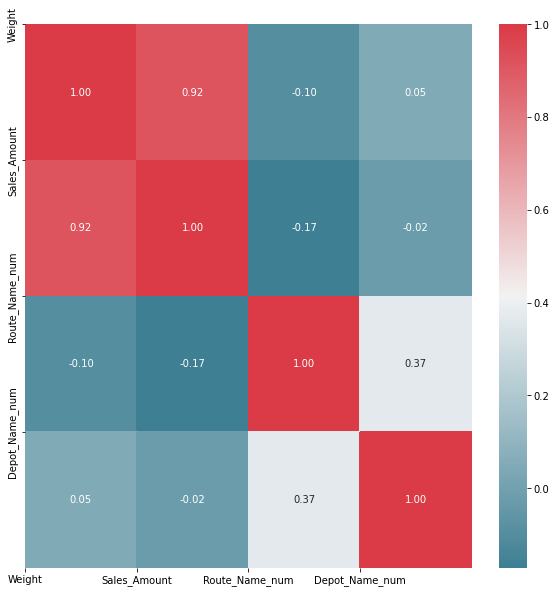

In [ ]:
# We then create a heatmap so as to have a visual 
# of our correlation matrix as shown below
# ---

# Let's set the size of our visualisation
fig, ax = plt.subplots(figsize = (10, 10))

# Let's generate a color map to use for our visualisation
colormap = sns.diverging_palette(220, 10, as_cmap = True)

# Generate heat map, allow annotations and place floats in map
sns.heatmap(corrMatrix, cmap = colormap, annot = True, fmt = ".2f")

# Apply xticks
plt.xticks(range(len(corrMatrix.columns)), corrMatrix.columns)

# Apply yticks
plt.yticks(range(len(corrMatrix.columns)), corrMatrix.columns)

# show plot
plt.show()

## Multiple Regression Model

In [ ]:
#Loading and previewing our data

milk_df =pd.read_excel('/content/Excelsample.xlsx')

#Preview first five records

milk_df.head()

,Delivery Date,Depot Name,Route Name,Weight,Sales_Amount
0,2019-01-01,Depot 1,Route 1,2639.94,248751.0
1,2019-01-01,Depot 1,Route 2,3389.89,259271.0
2,2019-01-01,Depot 1,Route 3,2160.94,198180.0
3,2019-01-01,Depot 1,Route 4,3097.03,283703.0
4,2019-01-01,Depot 1,Route 5,2438.94,220983.0


In [ ]:
#Previewing statistical summary

milk_df.describe()

,Weight,Sales_Amount
count,3772.000000,3772.000000
mean,2365.279981,206309.702545
std,964.729879,94770.025019
min,1.000000,35.000000
25%,1750.235000,140687.000000
50%,2271.340000,196139.500000
75%,2887.315000,259431.000000
max,14082.520000,968620.000000


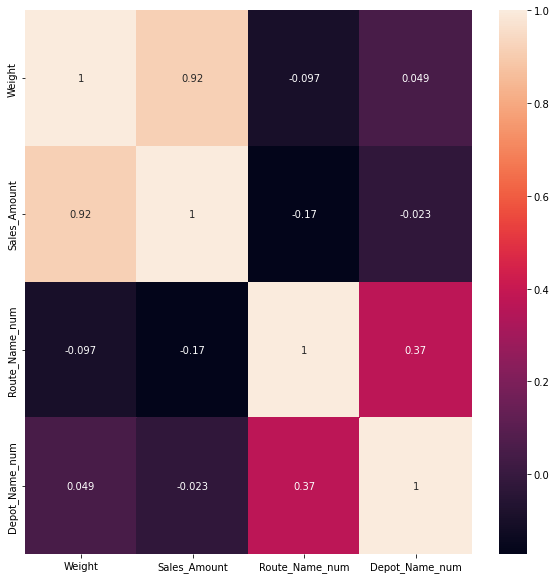

In [ ]:
#We can plot a visualisation of the matrix for better clarity
# --- 
# 
import seaborn as sns

# We define how big we want our visualisation
# 
plt.figure(figsize=(10, 10)) 

# Creating our visualisation
# 
sns.heatmap(corrMatrix, annot = True)

In [ ]:
#We now prepare our dataset so that we can fit our model
# ---
# We divide our data into attributes and labels. 
# This time, we use column names for creating an attribute set and label.
# ---
#X = milk_df.iloc[:, 3].values  
#y = milk_df.iloc[:, 3].values  

X = milk_df[['Weight']]
y = milk_df['Sales_Amount']


In [ ]:
# We then Split our datset
# ---
# We split our dataset into training and test sets. 80% = training set, while 20% = test set
# ---
#

# Firstly, importing our train_test_split function
# ---
#
from sklearn.model_selection import train_test_split

# Performing our split
# ---
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Training the Algorithm
# ---
# 

# Firstly, importing our linear regression function
# ---
#
from sklearn.linear_model import LinearRegression

# Training the algorithm
# ---
# 
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Making Predictions
# ---
# After training our algorithm, we can now make some preditions
# ---
# We create the y_pred variable, which will contain 
# all the predicted values for the input values in the X_test series
# ---
#
y_pred = regressor.predict(X_test)

In [ ]:
# We now compare actual output values for X_test with the predicted values
# This should also give us a sense of how our model performed during prediction
# ---
#
milk_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
milk_df.sample(10)

,Actual,Predicted
3289,208745.0,164280.710592
117,90716.0,91888.923024
45,255689.0,246859.903132
891,274675.0,259230.515505
3605,164893.0,134536.750335
1646,135832.0,175886.841884
2275,138586.0,141297.881954
3650,136479.0,134690.005041
1069,211094.0,274833.816339
2277,121550.0,121082.600299


In [ ]:
# We evaluate our model performance
# --- 
# The final step is to evaluate the performance of algorithm  
# Root Mean Squared Error (RMSE). This is the square root of the mean of the squared errors.
# ---  
#
from sklearn import metrics 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
mn = milk_df['Actual'].mean()
ten_per = mn * 10/100
print('10%_of_mean:', ten_per)


Root Mean Squared Error: 38249.47829125749
10%_of_mean: 20327.222357615898


In [ ]:
# Observation
# ---
# We can see that the value of root mean squared error is 38249.48, 
# which is more than 10% of the mean value of the Sales_Amount of 206309.702
# This means that our algorithm is inaccurate and thus not ideal for predictions.
